# Machine Learning: Supervised Classification

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (confusion_matrix, precision_score,accuracy_score,
                            recall_score,mean_squared_error,roc_curve, auc)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

We Use the Cumulative Database of Objects of Interest of the Kepler Exoplanet Observatory at https://exoplanetarchive.ipac.caltech.edu/docs/data.html

In this notebook we use several classifiers in order to reproduce de disposition of the observed object among the classes CONFIRMED and FALSE POSITIVE.

In [2]:
# Load the exoplanet database
data_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=cumulative&select=kepid,kepoi_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_sma,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag&format=csv"
df_kepler = pd.read_csv(data_url)

Drop All NaNs

In [3]:
df_kepler_clean=df_kepler.dropna().reset_index(drop=True)
df_kepler_clean

,kepid,kepoi_name,koi_disposition,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_sma,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad,koi_smass,ra,dec,koi_kepmag
0,10797460,K00752.01,CONFIRMED,9.488036,170.538750,0.146,2.95750,615.8,2.26,0.0853,793.0,93.59,35.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
1,10797460,K00752.02,CONFIRMED,54.418383,162.513840,0.586,4.50700,874.8,2.83,0.2734,443.0,9.11,25.8,5455.0,4.467,0.927,0.919,291.93423,48.141651,15.347
2,10811496,K00753.01,CANDIDATE,19.899140,175.850252,0.969,1.78220,10829.0,14.60,0.1419,638.0,39.30,76.3,5853.0,4.544,0.868,0.961,297.00482,48.134129,15.436
3,10848459,K00754.01,FALSE POSITIVE,1.736952,170.307565,1.276,2.40641,8079.2,33.46,0.0267,1395.0,891.96,505.6,5805.0,4.564,0.791,0.836,285.53461,48.285210,15.597
4,10854555,K00755.01,CONFIRMED,2.525592,171.595550,0.701,1.65450,603.3,2.75,0.0374,1406.0,926.16,40.9,6031.0,4.438,1.046,1.095,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,10090151,K07985.01,FALSE POSITIVE,0.527699,131.705093,1.252,3.22210,1579.2,29.35,0.0128,2088.0,4500.53,453.3,5638.0,4.529,0.903,1.005,297.18875,47.093819,14.082
9196,10128825,K07986.01,CANDIDATE,1.739849,133.001270,0.043,3.11400,48.5,0.72,0.0290,1608.0,1585.81,10.6,6119.0,4.444,1.031,1.075,286.50937,47.163219,14.757
9197,10147276,K07987.01,FALSE POSITIVE,0.681402,132.181750,0.147,0.86500,103.6,1.07,0.0157,2218.0,5713.41,12.3,6173.0,4.447,1.041,1.104,294.16489,47.176281,15.385
9198,10155286,K07988.01,CANDIDATE,333.486169,153.615010,0.214,3.19900,639.1,19.30,1.2233,557.0,22.68,14.0,4989.0,2.992,7.824,2.190,296.76288,47.145142,10.998


We keep only physical data of the observed object

In [4]:
df=df_kepler_clean.drop(['kepid', 'kepoi_name'], axis=1)

We take only information about the classes CONFIRMED and FALSE POSITIVE for the binary classification in order to obtain a model that can be used on the CANDIDATE class.

In [8]:
df=df[df['koi_disposition']!='CANDIDATE'].reset_index(drop=True)

In [9]:
df['koi_disposition'].unique()

array([0, 1])

Encode the target variable

In [11]:
le=LabelEncoder()
df['koi_disposition']=le.fit_transform(df['koi_disposition'])

Identify the Independent and dependent variables and split into train and test sets

In [12]:
X=df.drop('koi_disposition',axis=1).values
y=df['koi_disposition'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [13]:
scaler=StandardScaler()
X_train_scaled_1=scaler.fit_transform(X_train)
X_test_scaled_1=scaler.transform(X_test)

## Logistic Regression

In [14]:
lr=LogisticRegression()
lr.fit(X_train_scaled_1,y_train)

LogisticRegression()

Crossed Validation

In [15]:
scores_1=cross_val_score(lr,X_train_scaled_1,y_train)
print(f'Logistic Regression Score = {scores_1.mean()} +/- {scores_1.std()}')

Logistic Regression Score = 0.8483595655487803 +/- 0.0035708040417453944


In [16]:
y_predict_1=lr.predict(X_test_scaled_1)

Confusion Matrix

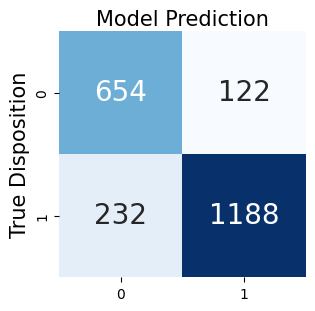

In [17]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_1)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [18]:
print(f'Precision: {precision_score(y_test,y_predict_1)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_1)}')
print(f'Recall: {recall_score(y_test,y_predict_1)}')

Precision: 0.9068702290076336
Accuracy: 0.8387978142076503
Recall: 0.8366197183098592


## Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier(n_estimators=1000,random_state=10)
rf.fit(X_train_scaled_1,y_train)

RandomForestClassifier(n_estimators=1000, random_state=10)

Crossed Validation

In [71]:
scores_rf=cross_val_score(rf,X_train_scaled_1,y_train)
print(f'Random Forest Score = {scores_rf.mean()} +/- {scores_rf.std()}')

Random Forest Score = 0.9162759146341465 +/- 0.006095555310383085


In [ ]:
y_predict_rf=rf.predict(X_test_scaled_1)

Confusion Matrix

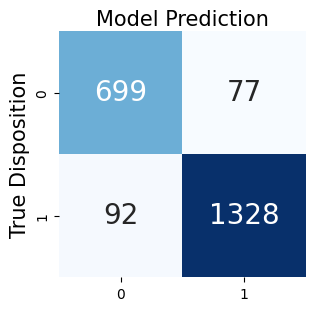

In [73]:
class_names=[0,0]
fig,ax=plt.subplots(figsize=(3,3))
tick_marks=(np.arange(len(class_names)))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_predict_rf)),annot=True,
            cmap='Blues',fmt='g',cbar=False,
            annot_kws={'size':20})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('True Disposition', fontsize=15,y=0.5)
plt.xlabel('Model Prediction', fontsize=15)
plt.show()

Metrics

In [74]:
print(f'Precision: {precision_score(y_test,y_predict_rf)}')
print(f'Accuracy: {accuracy_score(y_test,y_predict_rf)}')
print(f'Recall: {recall_score(y_test,y_predict_rf)}')

Precision: 0.9451957295373665
Accuracy: 0.9230418943533698
Recall: 0.9352112676056338
